<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Сабмит" data-toc-modified-id="Сабмит-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Сабмит</a></span></li></ul></div>

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from tqdm.notebook import tqdm
from shapely.geometry import Polygon

# EDA данных

In [2]:
def count_files_in_folders(root_folder):
    data = {'Папка': [], 'Количество файлов': []}

    for folder_name in os.listdir(root_folder):
        folder_path = os.path.join(root_folder, folder_name)

        # Проверьте, является ли элемент папкой
        if os.path.isdir(folder_path):
            # Подсчитайте количество файлов в папке (предполагая, что файлы имеют расширение .jpg)
            file_count = len([f for f in os.listdir(folder_path) if f.endswith('.txt')])

            # Добавьте информацию в словарь
            data['Папка'].append(folder_name)
            data['Количество файлов'].append(file_count)
    df = pd.DataFrame(data)
    return df

folder_path = r'I:\Хакатоны\Цифровой прорыв Ставрополь\train_dataset_train\cameras'
result_df = count_files_in_folders(folder_path)

result_df

,Папка,Количество файлов
0,DpR-Csp-uipv-ShV-V1,391
1,Pgp-com2-K-1-0-9-36,627
2,Pgp-lpc2-K-0-1-38,1003
3,Phl-com3-Shv2-9-K34,765
4,Php-Angc-K3-1,876
5,Php-Angc-K3-8,658
6,Php-Ctm-K-1-12-56,340
7,Php-Ctm-Shv1-2-K3,531
8,Php-nta4-shv016309-k2-1-7,291
9,Spp-210-K1-3-3-5,388


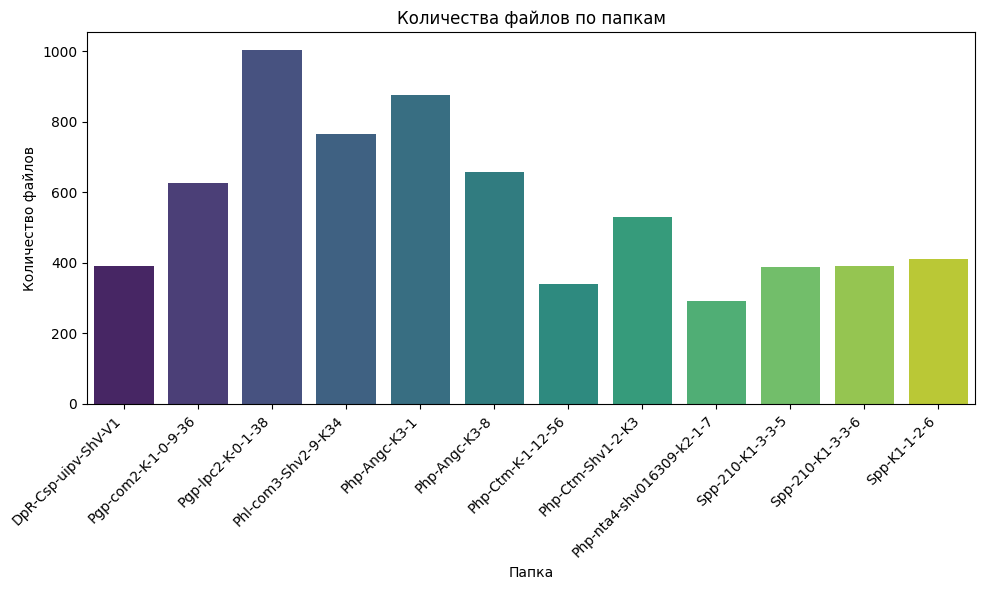

In [3]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Папка', y='Количество файлов', data=result_df, palette='viridis')
plt.title('Количества файлов по папкам')
plt.xlabel('Папка')
plt.ylabel('Количество файлов')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

In [4]:
def count_files_in_person(root_folder):
    data = {'Папка': [], 'Название файла': [], 'Кол-во человек на изображений': []}

    for folder_name in os.listdir(root_folder):
        folder_path = os.path.join(root_folder, folder_name)

        # Проверьте, является ли элемент папкой
        if os.path.isdir(folder_path):
            # Запишим название файлов (предполагая, что файлы имеют расширение .jpg)
            for f in os.listdir(folder_path):
                if f.endswith('.txt'):
                    # Добавьте информацию в словарь
                    data['Папка'].append(folder_name)
                    data['Название файла'].append(f)
                    with open(os.path.join(folder_path, f), 'r') as file:
                            lines = file.readlines()
                            data['Кол-во человек на изображений'].append(len(lines))
                    

    df = pd.DataFrame(data)
    return df

folder_path = r'I:\Хакатоны\Цифровой прорыв Ставрополь\train_dataset_train\cameras'
result_df = count_files_in_person(folder_path)

result_df

,Папка,Название файла,Кол-во человек на изображений
0,DpR-Csp-uipv-ShV-V1,007abb91-8834-416d-9e69-4bfcf66632c1.txt,1
1,DpR-Csp-uipv-ShV-V1,017b87c8-b17d-449e-82b7-bb03190a8f77.txt,1
2,DpR-Csp-uipv-ShV-V1,01ab642d-bf5e-4ca1-929d-2549285399d1.txt,1
3,DpR-Csp-uipv-ShV-V1,02129e7c-bedc-433d-ae6d-50101f535b5a.txt,1
4,DpR-Csp-uipv-ShV-V1,026a64a4-7fd0-4bb0-899f-b4a5e34960b7.txt,1
...,...,...,...
6667,Spp-K1-1-2-6,Spp-K1-1-2-6_Karmany_2_prolet_2021-10-21_17-20...,1
6668,Spp-K1-1-2-6,Spp-K1-1-2-6_Karmany_2_prolet_2021-10-21_18-11...,1
6669,Spp-K1-1-2-6,Spp-K1-1-2-6_Karmany_2_prolet_2021-10-21_19-36...,1
6670,Spp-K1-1-2-6,Spp-K1-1-2-6_Karmany_2_prolet_2021-10-21_20-36...,1


In [5]:
x = result_df['Кол-во человек на изображений'].apply(lambda x: True if x > 0 else False).value_counts()
x.reset_index()

,Кол-во человек на изображений,count
0,True,4615
1,False,2057


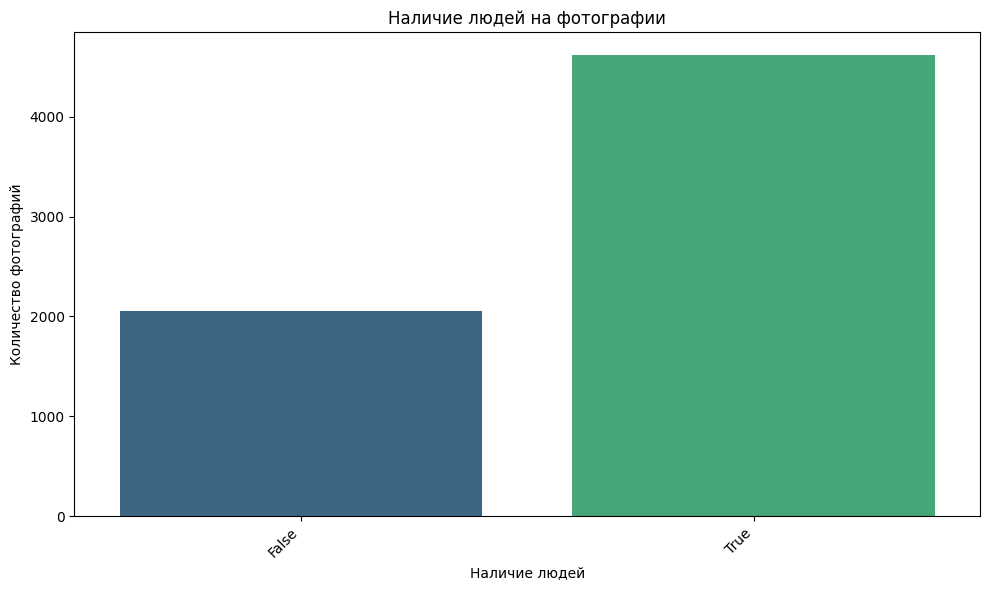

In [6]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Кол-во человек на изображений', y='count', data=x.reset_index(), palette='viridis')
plt.title('Наличие людей на фотографии')
plt.xlabel('Наличие людей')
plt.ylabel('Количество фотографий')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

In [7]:
result_df[result_df['Кол-во человек на изображений'] == 0]

,Папка,Название файла,Кол-во человек на изображений
533,Pgp-com2-K-1-0-9-36,4bac9e01-9776-4504-9ea6-7d4711d0ed0b.txt,0
577,Pgp-com2-K-1-0-9-36,65961084-c73e-43ed-81b8-ed309caa76da.txt,0
809,Pgp-com2-K-1-0-9-36,d84f18dd-9343-44a7-96c4-699abc884769.txt,0
856,Pgp-com2-K-1-0-9-36,f15ffc45-e6bb-42fb-b897-5cbf3515ace1.txt,0
1018,Pgp-lpc2-K-0-1-38,20211203143029191_UTC+03.txt,0
...,...,...,...
6657,Spp-K1-1-2-6,Spp-K1-1-2-6_Karmany_2_prolet_2021-10-19_20-43...,0
6658,Spp-K1-1-2-6,Spp-K1-1-2-6_Karmany_2_prolet_2021-10-20_02-00...,0
6662,Spp-K1-1-2-6,Spp-K1-1-2-6_Karmany_2_prolet_2021-10-20_18-21...,0
6665,Spp-K1-1-2-6,Spp-K1-1-2-6_Karmany_2_prolet_2021-10-21_14-12...,0


In [8]:
df_describe = result_df.groupby(['Папка'])['Кол-во человек на изображений'].describe()
df_describe

,count,mean,std,min,25%,50%,75%,max
Папка,,,,,,,,
DpR-Csp-uipv-ShV-V1,391.0,1.112532,0.420770,1.0,1.0,1.0,1.0,3.0
Pgp-com2-K-1-0-9-36,627.0,1.135566,0.386425,0.0,1.0,1.0,1.0,3.0
Pgp-lpc2-K-0-1-38,1003.0,0.662014,0.927740,0.0,0.0,0.0,1.0,6.0
Phl-com3-Shv2-9-K34,765.0,0.850980,0.552258,0.0,1.0,1.0,1.0,3.0
Php-Angc-K3-1,876.0,0.555936,0.686406,0.0,0.0,0.0,1.0,5.0
Php-Angc-K3-8,658.0,0.790274,0.730982,0.0,0.0,1.0,1.0,4.0
Php-Ctm-K-1-12-56,340.0,0.926471,1.109309,0.0,0.0,1.0,1.0,5.0
Php-Ctm-Shv1-2-K3,531.0,0.653484,0.620774,0.0,0.0,1.0,1.0,4.0
Php-nta4-shv016309-k2-1-7,291.0,1.378007,1.402485,0.0,0.0,1.0,3.0,4.0


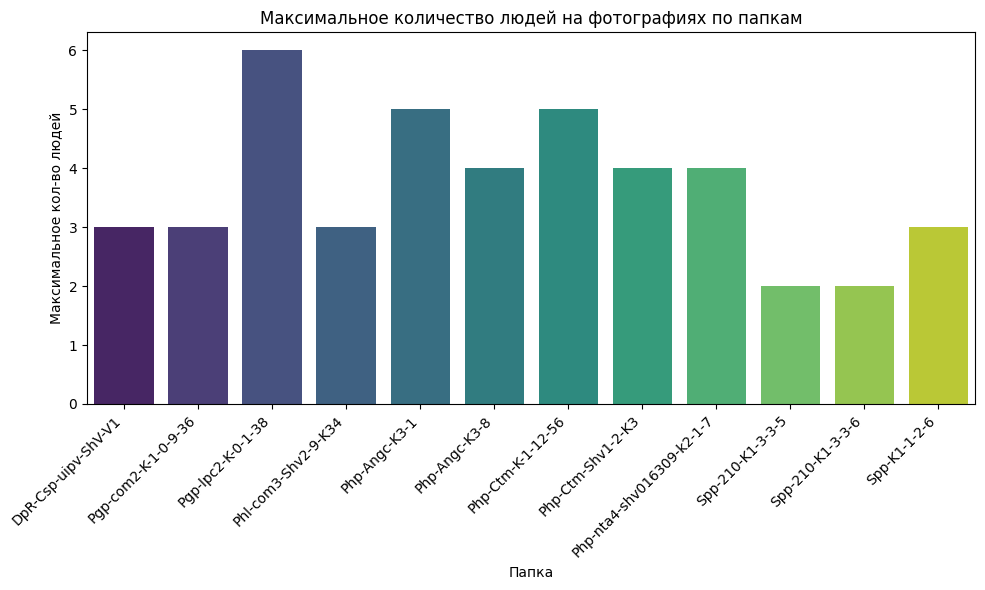

In [9]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Папка', y='max', data=df_describe.reset_index(), palette='viridis')
plt.title('Максимальное количество людей на фотографиях по папкам')
plt.xlabel('Папка')
plt.ylabel('Максимальное кол-во людей')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

In [10]:
df = result_df.groupby(['Папка'])['Кол-во человек на изображений'].agg(['mean', 'count', 'sum', 'std'])
df

,mean,count,sum,std
Папка,,,,
DpR-Csp-uipv-ShV-V1,1.112532,391,435,0.420770
Pgp-com2-K-1-0-9-36,1.135566,627,712,0.386425
Pgp-lpc2-K-0-1-38,0.662014,1003,664,0.927740
Phl-com3-Shv2-9-K34,0.850980,765,651,0.552258
Php-Angc-K3-1,0.555936,876,487,0.686406
Php-Angc-K3-8,0.790274,658,520,0.730982
Php-Ctm-K-1-12-56,0.926471,340,315,1.109309
Php-Ctm-Shv1-2-K3,0.653484,531,347,0.620774
Php-nta4-shv016309-k2-1-7,1.378007,291,401,1.402485


In [11]:
df.reset_index()

,Папка,mean,count,sum,std
0,DpR-Csp-uipv-ShV-V1,1.112532,391,435,0.420770
1,Pgp-com2-K-1-0-9-36,1.135566,627,712,0.386425
2,Pgp-lpc2-K-0-1-38,0.662014,1003,664,0.927740
3,Phl-com3-Shv2-9-K34,0.850980,765,651,0.552258
4,Php-Angc-K3-1,0.555936,876,487,0.686406
5,Php-Angc-K3-8,0.790274,658,520,0.730982
6,Php-Ctm-K-1-12-56,0.926471,340,315,1.109309
7,Php-Ctm-Shv1-2-K3,0.653484,531,347,0.620774
8,Php-nta4-shv016309-k2-1-7,1.378007,291,401,1.402485
9,Spp-210-K1-3-3-5,1.074742,388,417,0.263315


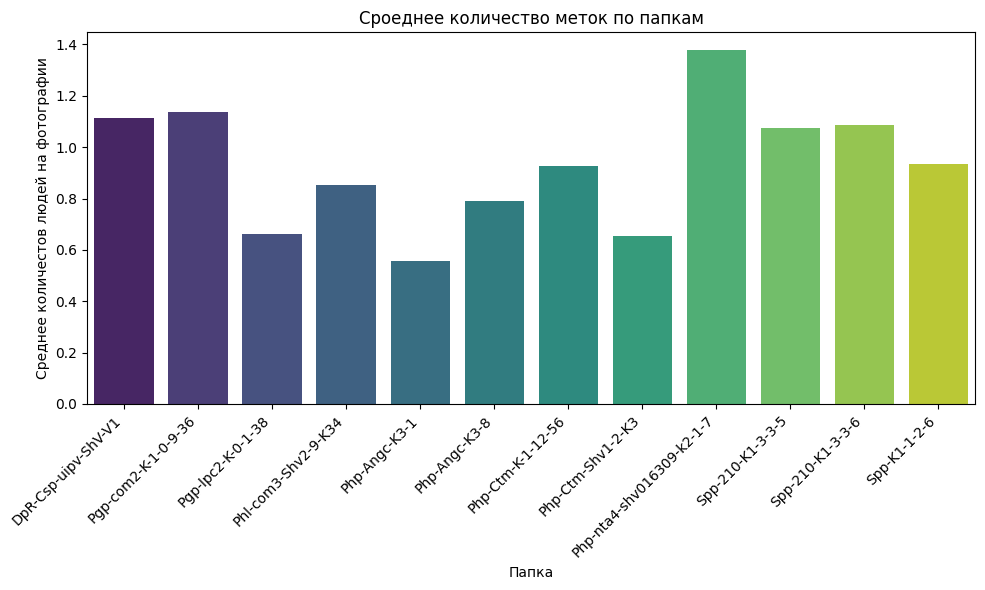

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Папка', y='mean', data=df.reset_index(), palette='viridis')
plt.title('Сроеднее количество меток по папкам')
plt.xlabel('Папка')
plt.ylabel('Среднее количестов людей на фотографии')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

In [13]:
df_null = result_df[result_df['Кол-во человек на изображений'] == 0].groupby(['Папка'])['Кол-во человек на изображений'].agg(['count'])

In [14]:
df_null

,count
Папка,
Pgp-com2-K-1-0-9-36,4
Pgp-lpc2-K-0-1-38,560
Phl-com3-Shv2-9-K34,180
Php-Angc-K3-1,467
Php-Angc-K3-8,231
Php-Ctm-K-1-12-56,152
Php-Ctm-Shv1-2-K3,216
Php-nta4-shv016309-k2-1-7,119
Spp-K1-1-2-6,128


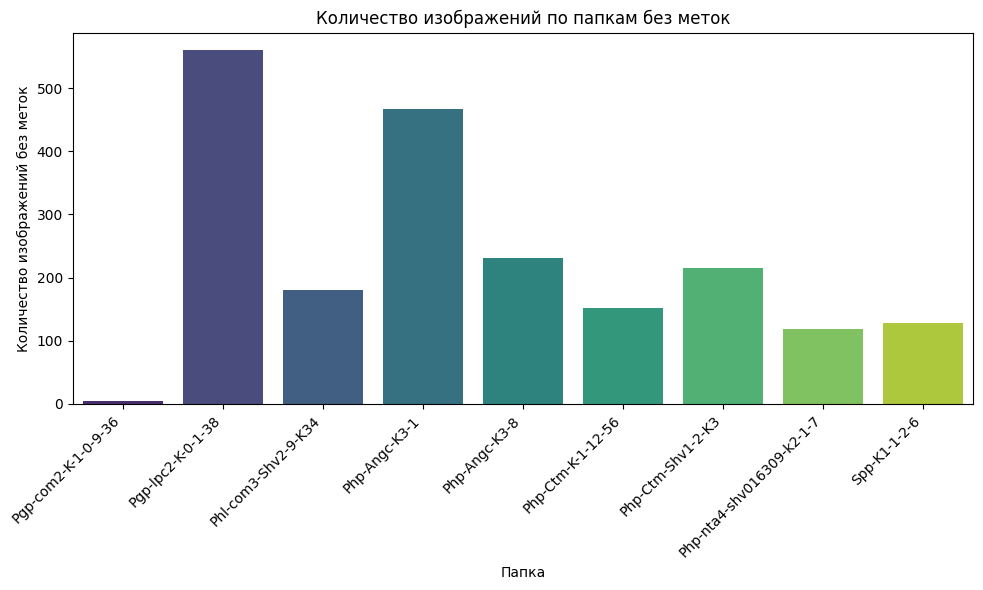

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Папка', y='count', data=df_null.reset_index(), palette='viridis')
plt.title('Количество изображений по папкам без меток')
plt.xlabel('Папка')
plt.ylabel('Количество изображений без меток')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

Посмотрим на картинку, посчитаем площадь нахождения в опасной зоне

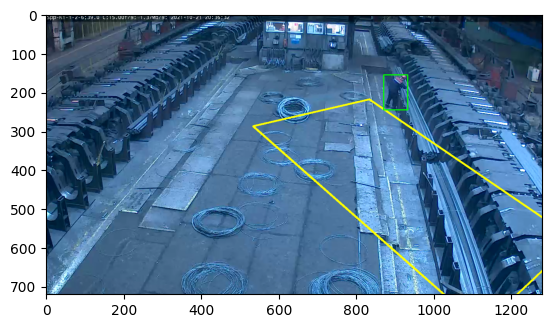

In [182]:
# Функция для чтения координат из файла
def read_coordinates(file_path, encoding='utf-8'):
    with open(file_path, 'r', encoding=encoding) as file:
        lines = file.readlines()
        coordinates = [list(map(float, line.strip().split()))[1:] for line in lines][0]
    return coordinates

# Функция для рисования зон на фотографии
def draw_zones(image, coordinates):
    for i in range(0, len(coordinates), 4):
        # Извлечь центр прямоугольника
        center_x = int(coordinates[i] * image.shape[1])
        center_y = int(coordinates[i + 1] * image.shape[0])

        # Половина ширины и высоты прямоугольника
        half_width = int(coordinates[i + 2] * image.shape[1] / 2)
        half_height = int(coordinates[i + 3] * image.shape[0] / 2)

        # Вычислить координаты углов прямоугольника
        x1, y1 = center_x - half_width, center_y - half_height
        x2, y2 = center_x + half_width, center_y + half_height

        # Нарисовать прямоугольник для каждой зоны
        cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)


# Путь к вашей фотографии
image_path = r'I:\Spp-K1-1-2-6_Karmany_2_prolet_2021-10-21_20-36-33.100.jpg'
# Путь к файлу с координатами
coordinates_file_path = r'I:\Spp-K1-1-2-6_Karmany_2_prolet_2021-10-21_20-36-33.100.txt'

# Загрузить фотографию
image = cv2.imread(image_path)

# Прочитать координаты из файла
coordinates = read_coordinates(coordinates_file_path)
# Нарисовать зоны на фотографии
draw_zones(image, coordinates)
coordinates_file_danger = r'I:\danger_DpR-Csp-uipv-ShV-V1.txt'

with open(coordinates_file_danger, 'r', encoding='utf-8') as file:
        lines = file.readlines()
        coordinat = list(eval(i.replace(',\n', '')) for i in lines)

for i in range(len(coordinat)-1):
    cv2.line(image, tuple(coordinat[i]), tuple(coordinat[i+1]), (0, 255, 255), 3)
cv2.line(image, tuple(coordinat[0]), tuple(coordinat[-1]), (0, 255, 255), 3)
# Нарисовать зоны на фотографии
draw_zones(image, coordinates)
# Отобразить фотографию на экране
cv2.imshow('Image', image)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()


In [92]:
def find_intersection_area(shape1, shape2):
    polygon1 = Polygon(shape1)
    polygon2 = Polygon(shape2)

    intersection = polygon1.intersection(polygon2)

    if intersection.is_empty:
        return 0
    else:
        return intersection.area

    
def coordinat_zones(file_path, file_path_zone):
    
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
        coordinates = [list(map(float, line.strip().split()))[1:] for line in lines][0]

    for i in range(0, len(coordinates), 4):
        # Извлечь центр прямоугольника
        center_x = int(coordinates[i] * image.shape[1])
        center_y = int(coordinates[i + 1] * image.shape[0])

        # Половина ширины и высоты прямоугольника
        half_width = int(coordinates[i + 2] * image.shape[1] / 2)
        half_height = int(coordinates[i + 3] * image.shape[0] / 2)

        # Вычислить координаты углов прямоугольника
        x1, y1 = center_x - half_width, center_y - half_height
        x2, y2 = center_x + half_width, center_y + half_height
        
        with open(file_path_zone, 'r', encoding='utf-8') as file:
                lines = file.readlines()
                coordinat = list(eval(i.replace(',\n', '')) for i in lines)
        cord1 = tuple(((x1, y1), (x2, y1), (x2, y2), (x1, y2)))
        cord2 = tuple((map(tuple,coordinat)))
        return cord1, cord2

file_path = r'I:\0ad15baf-36e9-4802-9657-81564172177c.txt'
file_path_zone = r'I:\danger_DpR-Csp-uipv-ShV-V1.txt'

def rectangle_area(cords):
    x_coords = [coord[0] for coord in cords]
    y_coords = [coord[1] for coord in cords]
    width = max(x_coords) - min(x_coords)
    height = max(y_coords) - min(y_coords)
    return width * height

coords = coordinat_zones(file_path, file_path_zone)
result = find_intersection_area(coords[0], coords[1])
print(f'Площадь пересечения: {result/rectangle_area(coords[0])}')

Площадь пересечения: 0.9423642326118492


Соберем все это в один датасет

In [194]:
def count_files_in_person_danjer(root_folder,fol_path):
    data = {'Папка': [], 'Название файла': [], 'Кол-во человек на изображении': [], 'Человек в опасности': [], 'Процент нахождения в опасной зоне': []}

    for folder_name in os.listdir(root_folder):
        folder_path = os.path.join(root_folder, folder_name)
        
        if folder_name == 'Spp-K1-1-2-6':
            cordinat = []
            for i in range(1,5):
                file = 'danger_'+folder_name+'_zone'+str(i)+'.txt'
                with open(os.path.join(fol_path, file), 'r', encoding='utf-8') as file:
                    lines = file.readlines()
                    cordinat.append(list(eval(i.replace(',\n', '')) for i in lines))
            
        else:            
            with open(os.path.join(fol_path, 'danger_'+folder_name+'.txt'), 'r', encoding='utf-8') as file:
                    lines = file.readlines()
                    cordinat = [list(eval(i.replace(',\n', '')) for i in lines)]

        # Проверьте, является ли элемент папкой
        if os.path.isdir(folder_path):
            # Запишим название файлов (предполагая, что файлы имеют расширение .jpg)
            for f in os.listdir(folder_path):
                if f.endswith('.txt'):
                    # Добавьте информацию в словарь
                    data['Папка'].append(folder_name)
                    data['Название файла'].append(f)
                    with open(os.path.join(folder_path, f), 'r') as file:
                            lines = file.readlines()
                            data['Кол-во человек на изображении'].append(len(lines))
                            coordinates = [list(map(float, line.strip().split()))[1:] for line in lines]
                    lst_coord = []
                    for coordinat in coordinates:
                        for i in range(0, len(coordinat), 4):
                            # Извлечь центр прямоугольника
                            center_x = int(coordinat[i] * image.shape[1])
                            center_y = int(coordinat[i + 1] * image.shape[0])

                            # Половина ширины и высоты прямоугольника
                            half_width = int(coordinat[i + 2] * image.shape[1] / 2)
                            half_height = int(coordinat[i + 3] * image.shape[0] / 2)

                            # Вычислить координаты углов прямоугольника
                            x1, y1 = center_x - half_width, center_y - half_height
                            x2, y2 = center_x + half_width, center_y + half_height
                            lst_coord.append([(x1, y1), (x2, y1), (x2, y2), (x1, y2)])
                                    
                    lst = []
                    lst_2 = [0]
                    for i in cordinat:
                        for j in lst_coord:
                            polygon1 = Polygon(i)
                            polygon2 = Polygon(j)

                            intersection = polygon1.intersection(polygon2)
                            try:
                                if intersection.area/rectangle_area(j) > 0.15:
                                    lst.append(True)
                                    print(intersection.area/rectangle_area(j))
                                    

                                else:
                                    lst.append(False)
                                    lst_2.append(0)
                                lst_2.append(intersection.area/rectangle_area(j))
                            except:
                                lst.append(False)
                                lst_2.append(0)
                    data['Человек в опасности'].append(any(lst))
                    print(lst_2)
                    data['Процент нахождения в опасной зоне'].append(max(lst_2))
                    
      
    print(len(data['Человек в опасности']))
    print(len(data['Название файла']))
    df = pd.DataFrame(data)
    return df

root_folder = r'I:\Хакатоны\Цифровой прорыв Ставрополь\train_dataset_train\cameras'
folder_path = r'I:\Хакатоны\Цифровой прорыв Ставрополь\train_dataset_train\danger_zones'
df_cor = count_files_in_person_danjer(root_folder,folder_path)
df_cor

[0, 0, 0.14716196746242968]
[0, 0, 0.026863106869396757]
[0, 0, 0.004695429332624147]
0.7597065565718845
[0, 0.7597065565718845]
0.22489772063121
[0, 0.22489772063121]
[0, 0, 0.0, 0, 0.0, 0, 0.0]
1.0
[0, 1.0]
0.9469984575817092
[0, 0.9469984575817092]
[0, 0, 0.013198258151674294]
[0, 0, 0.0]
1.0
[0, 1.0]
0.3080577993848488
[0, 0.3080577993848488]
0.2695577330508474
[0, 0.2695577330508474]
[0, 0, 0.10281041159028198]
1.0
[0, 1.0]
[0, 0, 0.0]
[0, 0, 0.04098002640628838]
[0, 0, 0.14110889031020152]
[0, 0, 0.0]
0.9123220504130405
[0, 0.9123220504130405]
0.3603378378378379
[0, 0.3603378378378379]
1.0
[0, 1.0]
[0, 0, 0.11764150943396226]
0.8515979381443299
[0, 0.8515979381443299]
0.9592613944313941
[0, 0.9592613944313941]
0.8145499999999999
[0, 0.8145499999999999]
[0, 0, 0.05620541721541457]
0.9907256027783334
[0, 0.9907256027783334]
1.0
[0, 1.0]
[0, 0, 0.14688553965926776]
0.2625282485875708
[0, 0.2625282485875708]
[0, 0, 0.06536842105263166]
1.0
[0, 1.0]
0.7680414409246208
[0, 0.7680414409

,Папка,Название файла,Кол-во человек на изображении,Человек в опасности,Процент нахождения в опасной зоне
0,DpR-Csp-uipv-ShV-V1,007abb91-8834-416d-9e69-4bfcf66632c1.txt,1,False,0.147162
1,DpR-Csp-uipv-ShV-V1,017b87c8-b17d-449e-82b7-bb03190a8f77.txt,1,False,0.026863
2,DpR-Csp-uipv-ShV-V1,01ab642d-bf5e-4ca1-929d-2549285399d1.txt,1,False,0.004695
3,DpR-Csp-uipv-ShV-V1,02129e7c-bedc-433d-ae6d-50101f535b5a.txt,1,True,0.759707
4,DpR-Csp-uipv-ShV-V1,026a64a4-7fd0-4bb0-899f-b4a5e34960b7.txt,1,True,0.224898
...,...,...,...,...,...
6667,Spp-K1-1-2-6,Spp-K1-1-2-6_Karmany_2_prolet_2021-10-21_17-20...,1,True,0.293486
6668,Spp-K1-1-2-6,Spp-K1-1-2-6_Karmany_2_prolet_2021-10-21_18-11...,1,True,0.214227
6669,Spp-K1-1-2-6,Spp-K1-1-2-6_Karmany_2_prolet_2021-10-21_19-36...,1,False,0.000000
6670,Spp-K1-1-2-6,Spp-K1-1-2-6_Karmany_2_prolet_2021-10-21_20-36...,1,True,0.636739


In [195]:
df_cor[df_cor['Название файла'] == 'Spp-K1-1-2-6_Karmany_2_prolet_2021-10-21_20-36-33.100.txt']

,Папка,Название файла,Кол-во человек на изображении,Человек в опасности,Процент нахождения в опасной зоне
6670,Spp-K1-1-2-6,Spp-K1-1-2-6_Karmany_2_prolet_2021-10-21_20-36...,1,True,0.636739


In [196]:
x = df_cor['Человек в опасности'].apply(lambda x: True if x > 0 else False).value_counts()
x.reset_index()

,Человек в опасности,count
0,False,5105
1,True,1567


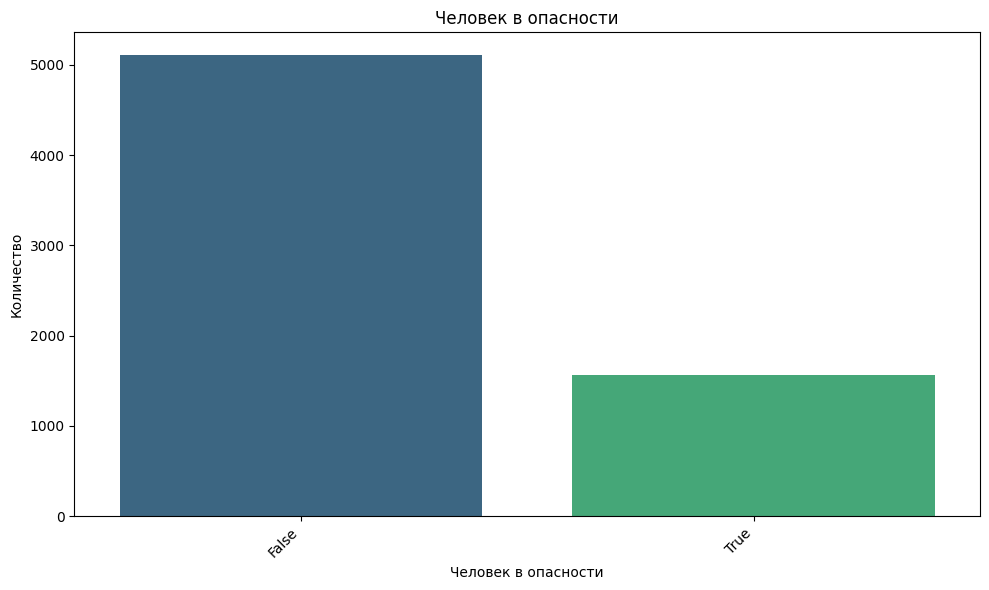

In [197]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Человек в опасности', y='count', data=x.reset_index(), palette='viridis')
plt.title('Человек в опасности')
plt.xlabel('Человек в опасности')
plt.ylabel('Количество')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

In [198]:
df_cor.to_csv('I:\dataset.csv', index=False)

# Создание датасета для кросс-валидации

In [ ]:
import datetime
import shutil
from pathlib import Path
from collections import Counter

In [67]:
import yaml
import numpy as np
import pandas as pd
from ultralytics import YOLO
from sklearn.model_selection import KFold

In [74]:
dataset_path = Path(r'I:\K-VOLDS') # replace with 'path/to/dataset' for your custom data
labels = sorted(dataset_path.rglob("*labels/*.txt")) # all data in 'labels'

In [76]:
yaml_file = 'I:\K-VOLDS/data.yaml'  # your data YAML with data directories and names dictionary
with open(yaml_file, 'r', encoding="utf8") as y:
    classes = yaml.safe_load(y)['names']
cls_idx = sorted(classes.keys())

In [78]:
indx = [l.stem for l in labels] # uses base filename as ID (no extension)
labels_df = pd.DataFrame([], columns=cls_idx, index=indx)

In [79]:
for label in labels:
    lbl_counter = Counter()

    with open(label,'r') as lf:
        lines = lf.readlines()

    for l in lines:
        # classes for YOLO label uses integer at first position of each line
        lbl_counter[int(l.split(' ')[0])] += 1

    labels_df.loc[label.stem] = lbl_counter

labels_df = labels_df.fillna(0.0) # replace `nan` values with `0.0`

In [80]:
labels_df

,0
0006ce26-22fa-4d0c-9935-39e5413baa4c,1.0
004b970f-cf66-4d94-b8ab-9c86101d9746,1.0
005c7fbd-d587-48fd-8ae5-1ab8e34e9507,1.0
0068bb1d-0521-4240-b7fe-7802ff2788ce,1.0
007abb91-8834-416d-9e69-4bfcf66632c1,1.0
...,...
Spp-K1-1-2-6_Karmany_2_prolet_2021-10-21_17-20-37.210,1.0
Spp-K1-1-2-6_Karmany_2_prolet_2021-10-21_18-11-39.845,1.0
Spp-K1-1-2-6_Karmany_2_prolet_2021-10-21_19-36-18.847,1.0
Spp-K1-1-2-6_Karmany_2_prolet_2021-10-21_20-36-33.100,1.0


In [81]:
ksplit = 5
kf = KFold(n_splits=ksplit, shuffle=True, random_state=20)   # setting random_state for repeatable results

kfolds = list(kf.split(labels_df))
kfolds

[(array([   0,    1,    2, ..., 6669, 6670, 6671]),
  array([  12,   20,   25, ..., 6646, 6651, 6657])),
 (array([   0,    1,    2, ..., 6668, 6669, 6670]),
  array([   5,    6,    7, ..., 6659, 6661, 6671])),
 (array([   1,    2,    3, ..., 6665, 6667, 6671]),
  array([   0,    9,   11, ..., 6668, 6669, 6670])),
 (array([   0,    2,    3, ..., 6669, 6670, 6671]),
  array([   1,    4,    8, ..., 6660, 6662, 6665])),
 (array([   0,    1,    4, ..., 6669, 6670, 6671]),
  array([   2,    3,   15, ..., 6653, 6664, 6667]))]

In [82]:
folds = [f'split_{n}' for n in range(1, ksplit + 1)]
folds_df = pd.DataFrame(index=indx, columns=folds)

for idx, (train, val) in enumerate(kfolds, start=1):
    folds_df[f'split_{idx}'].loc[labels_df.iloc[train].index] = 'train'
    folds_df[f'split_{idx}'].loc[labels_df.iloc[val].index] = 'val'

In [83]:
fold_lbl_distrb = pd.DataFrame(index=folds, columns=cls_idx)

for n, (train_indices, val_indices) in enumerate(kfolds, start=1):
    train_totals = labels_df.iloc[train_indices].sum()
    val_totals = labels_df.iloc[val_indices].sum()

    # To avoid division by zero, we add a small value (1E-7) to the denominator
    ratio = val_totals / (train_totals + 1E-7)
    fold_lbl_distrb.loc[f'split_{n}'] = ratio

In [84]:
supported_extensions = ['.jpg', '.jpeg', '.png']

# Initialize an empty list to store image file paths
images = []

# Loop through supported extensions and gather image files
for ext in supported_extensions:
    images.extend(sorted((dataset_path / 'images').rglob(f"*{ext}")))

# Create the necessary directories and dataset YAML files (unchanged)
save_path = Path(dataset_path / f'{datetime.date.today().isoformat()}_{ksplit}-Fold_Cross-val')
save_path.mkdir(parents=True, exist_ok=True)
ds_yamls = []

for split in folds_df.columns:
    # Create directories
    split_dir = save_path / split
    split_dir.mkdir(parents=True, exist_ok=True)
    (split_dir / 'train' / 'images').mkdir(parents=True, exist_ok=True)
    (split_dir / 'train' / 'labels').mkdir(parents=True, exist_ok=True)
    (split_dir / 'val' / 'images').mkdir(parents=True, exist_ok=True)
    (split_dir / 'val' / 'labels').mkdir(parents=True, exist_ok=True)

    # Create dataset YAML files
    dataset_yaml = split_dir / f'{split}_dataset.yaml'
    ds_yamls.append(dataset_yaml)

    with open(dataset_yaml, 'w') as ds_y:
        yaml.safe_dump({
            'path': split_dir.as_posix(),
            'train': 'train',
            'val': 'val',
            'names': classes
        }, ds_y)

In [85]:
for image, label in zip(images, labels):
    for split, k_split in folds_df.loc[image.stem].items():
        # Destination directory
        img_to_path = save_path / split / k_split / 'images'
        lbl_to_path = save_path / split / k_split / 'labels'

        # Copy image and label files to new directory (SamefileError if file already exists)
        shutil.copy(image, img_to_path / image.name)
        shutil.copy(label, lbl_to_path / label.name)

In [87]:
folds_df

,split_1,split_2,split_3,split_4,split_5
0006ce26-22fa-4d0c-9935-39e5413baa4c,train,train,val,train,train
004b970f-cf66-4d94-b8ab-9c86101d9746,train,train,train,val,train
005c7fbd-d587-48fd-8ae5-1ab8e34e9507,train,train,train,train,val
0068bb1d-0521-4240-b7fe-7802ff2788ce,train,train,train,train,val
007abb91-8834-416d-9e69-4bfcf66632c1,train,train,train,val,train
...,...,...,...,...,...
Spp-K1-1-2-6_Karmany_2_prolet_2021-10-21_17-20-37.210,train,train,train,train,val
Spp-K1-1-2-6_Karmany_2_prolet_2021-10-21_18-11-39.845,train,train,val,train,train
Spp-K1-1-2-6_Karmany_2_prolet_2021-10-21_19-36-18.847,train,train,val,train,train
Spp-K1-1-2-6_Karmany_2_prolet_2021-10-21_20-36-33.100,train,train,val,train,train


In [88]:
fold_lbl_distrb

,0
split_1,0.251195
split_2,0.249295
split_3,0.257754
split_4,0.243897
split_5,0.247941


In [90]:
ds_yamls

[WindowsPath('I:/K-VOLDS/2023-11-11_5-Fold_Cross-val/split_1/split_1_dataset.yaml'),
 WindowsPath('I:/K-VOLDS/2023-11-11_5-Fold_Cross-val/split_2/split_2_dataset.yaml'),
 WindowsPath('I:/K-VOLDS/2023-11-11_5-Fold_Cross-val/split_3/split_3_dataset.yaml'),
 WindowsPath('I:/K-VOLDS/2023-11-11_5-Fold_Cross-val/split_4/split_4_dataset.yaml'),
 WindowsPath('I:/K-VOLDS/2023-11-11_5-Fold_Cross-val/split_5/split_5_dataset.yaml')]

# Аугментация данных

In [175]:
res = Mosaic(r'I:\K-VOLDS/data.yaml', imgsz=640, p=1.0, n=4)

In [178]:
res